# Movie Recommendation System with Python

In this project, we'll develop a basic recommender system with Python and pandas.

Movies will be suggested by similarity to other movies; this is not a robust recommendation system, but something to start out on.

## Data

In [1]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


## Exploratory Analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

In [3]:
ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [4]:
ratings.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Visualizing the number of ratings:

In [5]:
rating = pd.DataFrame(ratings.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [6]:
rating['no. of ratings'] = pd.DataFrame(ratings.groupby('title')['rating'].count())
rating.head()

,rating,no. of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<AxesSubplot:>

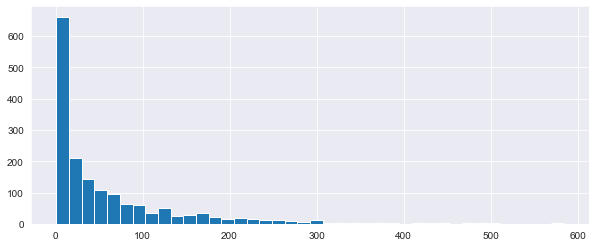

In [7]:
plt.figure(figsize=(10,4))
rating['no. of ratings'].hist(bins=40)

<AxesSubplot:>

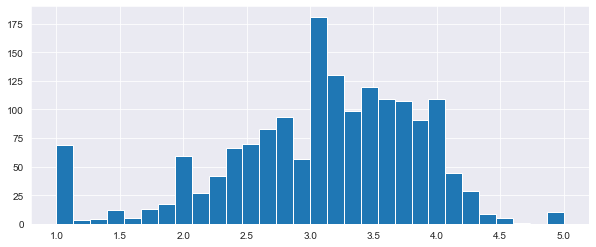

In [8]:
plt.figure(figsize=(10,4))
rating['rating'].hist(bins=30)

t makes intuitive sense for most ratings to be around the 3.0 mark.

## Recommender System

Now we'll pivot this table to construct a nice matrix of users and the movies they rated. NaN indicates missing data, or movies that a given user did not watch:

In [9]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


pandas has a built-in corr() method that will compute a correlation score for every column pair in the matrix! This gives us a correlation score between every pair of movies (where at least one user rated both movies - otherwise NaN's will show up).

In [10]:
corrMatrix = userRatings.corr()
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


However, we want to avoid spurious results that happened from just a handful of users that happened to rate the same pair of movies. In order to restrict our results to movies that lots of people rated together - and also give us more popular results that are more easily recongnizable - we'll use the min_periods argument to throw out results where fewer than 100 users rated a given movie pair:

In [11]:
corrMatrix = userRatings.corr(method='pearson', min_periods=100)
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's produce some movie recommendations for user ID 0, who we manually added to the data set as a test case. The User really likes Star Wars and The Empire Strikes Back, but hated Gone with the Wind. we'll extract this ratings from the userRatings DataFrame, and use dropna() to get rid of missing data (leaving only with a Series of the movies that were actually rated:)

In [12]:
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

Now, let's go through each movie we rated one at a time, and build up a list of possible recommendations based on the movies similar to the ones I rated.

So for each movie we rated, we'll retrieve the list of similar movies from our correlation matrix. we'll then scale those correlation scores by how well we rated the movie they are similar to, so movies similar to ones we liked count more than movies similar to ones we hated:

In [13]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * myRatings[i])
    # Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Glance at our results so far:
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)                       5.000000
Star Wars (1977)                                      5.000000
Empire Strikes Back, The (1980)                       3.741763
Star Wars (1977)                                      3.741763
Return of the Jedi (1983)                             3.606146
Return of the Jedi (1983)                             3.362779
Raiders of the Lost Ark (1981)                        2.693297
Raiders of the Lost Ark (1981)                        2.680586
Austin Powers: International Man of Mystery (1997)    1.887164
Sting, The (1973)                                     1.837692
dtype: float64


<ipython-input-13-2e46217d9732>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  simCandidates = pd.Series()


This is starting to look like something useful! Note that some of the same movies came up more than once, because they were similar to more than one movie we rated. We'll use groupby() to add together the scores from movies that show up more than once, so they'll count more:

In [14]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()

In [15]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

Empire Strikes Back, The (1980)              8.877450
Star Wars (1977)                             8.870971
Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
dtype: float64

The last thing we have to do is filter out movies we've already rated, as recommending a movie we've already watched isn't helpful:

In [16]:
filteredSims = simCandidates.drop(myRatings.index)
filteredSims.head(10)

Return of the Jedi (1983)                    7.178172
Raiders of the Lost Ark (1981)               5.519700
Indiana Jones and the Last Crusade (1989)    3.488028
Bridge on the River Kwai, The (1957)         3.366616
Back to the Future (1985)                    3.357941
Sting, The (1973)                            3.329843
Cinderella (1950)                            3.245412
Field of Dreams (1989)                       3.222311
Wizard of Oz, The (1939)                     3.200268
Dumbo (1941)                                 2.981645
dtype: float64

There we have it!